# Project 1

## Installs & Upgrades (remove comments if you deem it necessary)

In [198]:
#!pip install numpy --upgrade
#!pip install matplotlib --upgrade

## Import the Corresponding Libraries

In [199]:
import numpy as np
import matplotlib.pyplot as plt

## Generate the points and the polynomial p(x)

In [200]:
# Generate the data and define A using vandermonde
x = np.linspace(0, 1, 21)
init_coef = np.ones(15,)
A = np.vander(x, 15, increasing = True)
y = np.array([sum(init_coef[j]*x[i]**j for j in range(15)) for i in range(21)])

In [201]:
# create the polynomial
def p(a):
    y = A @ a
    return y

## What is the condition of A?

In [202]:
print(np.linalg.cond(A))

52177848099.936485


# Normal Equations

In [203]:
# generate the transpose of A and A_T_A
A_T_A = A.T @ A
# solve the equation and get the coefficients
coefficients = np.linalg.solve(A_T_A, A.T @ y)
y_hat = p(coefficients)
error = np.linalg.norm(init_coef - coefficients)
print("The error using the Normal Equations method is: ", error)

The error using the Normal Equations method is:  17.453728532266638


## Plot the actual along with the approximated points

Text(0.5, 1.0, 'Exact and approximated Points')

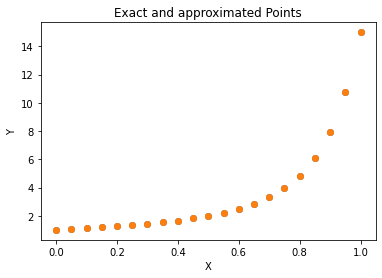

In [204]:
# Generate the plots
plt.plot(x, y,'o')
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(x, y_hat,'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Exact and approximated Points")

*We can see that the points despite the relatively large error, are so close that we see only 1 point in each spot.*

## Plot the residuals

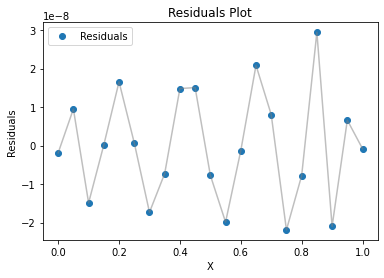

In [205]:
# Calculate the residuals
residuals = y - y_hat

# Plot the residuals with lines between points
plt.plot(x, residuals, 'o', label='Residuals')
plt.plot(x, residuals, '-', color='gray', alpha=0.5)

plt.xlabel('X')
plt.ylabel('Residuals')
plt.title("Residuals Plot")
plt.legend()

plt.show()

# QR Decomposition

## Check if Thin QR is more efficient

In [206]:
# According to our theory, if the rank is < 15 then Thin QR can work equally great with less cost

# Compute the rank of A
rank = np.linalg.matrix_rank(A)

# Print the rank of A
print("Rank of A:", rank)

Rank of A: 15


## Least Squares using QR Decomposition

In [207]:
from scipy.linalg import qr

# Compute the QR factorization of A
Q, R = qr(A)
Q_cut = Q[:, :15]
R_cut = R[:15, :15]

### Solve the equation effectively

In [208]:
x_qr = np.linalg.solve(R_cut, Q_cut.T @ y)

# Calculate the error
y_hat_qr = p(x_qr)
error_qr = np.linalg.norm(init_coef - x_qr)
print("The error using the QR method is: ", error_qr)

The error using the QR method is:  1.6783568259876148e-05


## Plot the actual along with the approximated points

Text(0.5, 1.0, 'Exact and approximated Points')

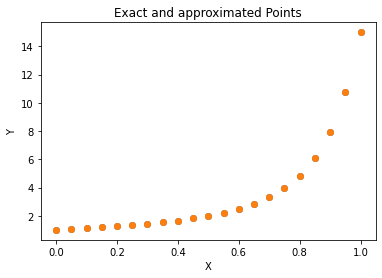

In [209]:
# Generate the plots
plt.plot(x, y,'o')
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(x, y_hat_qr,'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Exact and approximated Points")

*Once again, the points are so close that we see only 1 point in each spot.*

## Plot the residuals

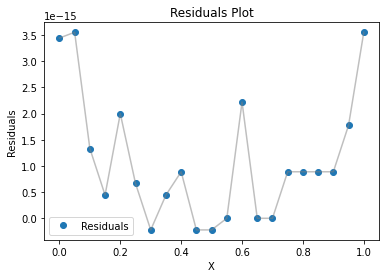

In [210]:
# Calculate the residuals
residuals = y - y_hat_qr

# Plot the residuals with lines between points
plt.plot(x, residuals, 'o', label='Residuals')
plt.plot(x, residuals, '-', color='gray', alpha=0.5)

plt.xlabel('X')
plt.ylabel('Residuals')
plt.title("Residuals Plot")
plt.legend()

plt.show()

# QR with regularization

## A function that takes 'a' as a parameter

In [211]:
def reg_qr(A, y, a):

    I = a * np.identity(A.shape[1])
    A_enlarged = np.vstack((A, I))
    Q_reg, R_reg = qr(A_enlarged)
    R_reg_cut = R_reg[:A.shape[1], :A.shape[1]]
    Q_reg_cut = Q_reg[:, :A.shape[1]]

    y_reg = np.concatenate((y, np.zeros(A.shape[1])))
    x_qr_reg = np.linalg.solve(R_reg_cut, Q_reg_cut.T @ y_reg)

    # Calculate the error
    error_qr_reg = np.linalg.norm(init_coef - x_qr_reg)


    return error_qr_reg

a = 1e-7
error_qr_reg = reg_qr(A, y, a)
print("The error using regularized QR method is: ", error_qr_reg)

The error using regularized QR method is:  7.878326918656066e-09


## What if 'a' was larger?

In [212]:
a = 1e-6
error_qr_reg = reg_qr(A, y, a)
print("The error using regularized QR method with a larger 'a' is: ", error_qr_reg)

The error using regularized QR method with a larger 'a' is:  1.0381531050966516e-08


## What if 'a' was smaller?

In [213]:
a = 1e-8
error_qr_reg = reg_qr(A, y, a)
print("The error using regularized QR method with a smaller 'a' is: ", error_qr_reg)

The error using regularized QR method with a smaller 'a' is:  5.966642070636083e-08


## Plot the error in terms of 'a'

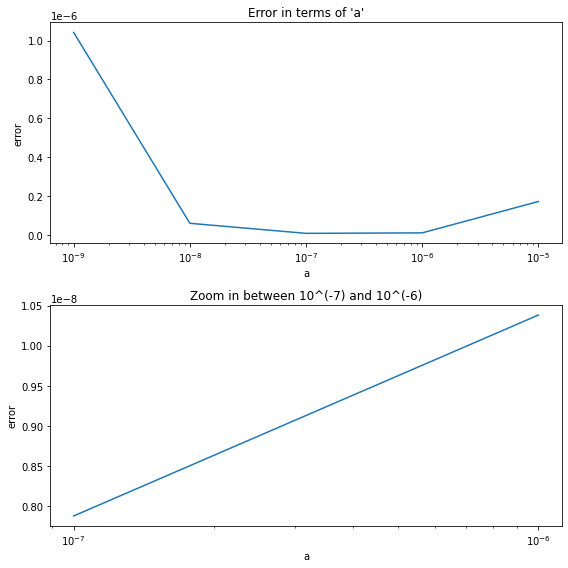

In [214]:
# Create a list of a values for the first plot (5-10)
a_values_1 = [10 ** (-i) for i in range(5, 10)]

# Calculate the errors for each a value for the first plot
errors_1 = [reg_qr(A, y, a) for a in a_values_1]

# Create a list of a values for the second plot (6-7)
a_values_2 = [10 ** (-i) for i in range(6, 8)]

# Calculate the errors for each a value for the second plot
errors_2 = [reg_qr(A, y, a) for a in a_values_2]

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot for the first plot (5-10)
ax1.plot(a_values_1, errors_1)
ax1.set_xlabel('a')
ax1.set_ylabel('error')
ax1.set_xscale('log')
ax1.set_title("Error in terms of 'a'")

# Plot for the second plot (6-7)
ax2.plot(a_values_2, errors_2)
ax2.set_xlabel('a')
ax2.set_ylabel('error')
ax2.set_xscale('log')
ax2.set_title("Zoom in between 10^(-7) and 10^(-6)")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


We can see that decreasing 'a' to 10\^(-8) gets us a worse error than 10\^(-7). Moreover, we can see that if we increase it further than 10\^(-7) the error is increased as well. Therefore a = 10\^(-7) seems to be optimal.

# Truncated Least Squares

In [215]:
def truncated_SVD(A, y, r):
    # Calculate the SVD of A
    U, S, VT = np.linalg.svd(A, full_matrices= False)
    S = np.diag(S)

    # Truncate the SVD to keep only the first r terms
    U_trunc = U[:, :r]
    S_trunc = S[0:r,:r]
    VT_trunc = VT[:r, :]

    # Calculate the left Moore-Penrose pseudoinverse using the SVD factors
    S_inv = np.linalg.inv(S_trunc)

    a_hat_svd = VT_trunc.T @ S_inv @ U_trunc.T @ y

    # Calculate the error ||a - a_hat||2
    svd_error = np.linalg.norm(a_hat_svd-init_coef)

    return svd_error

errors = np.zeros(15,)
for i in range(15):
    errors[i] = truncated_SVD(A, y, i)

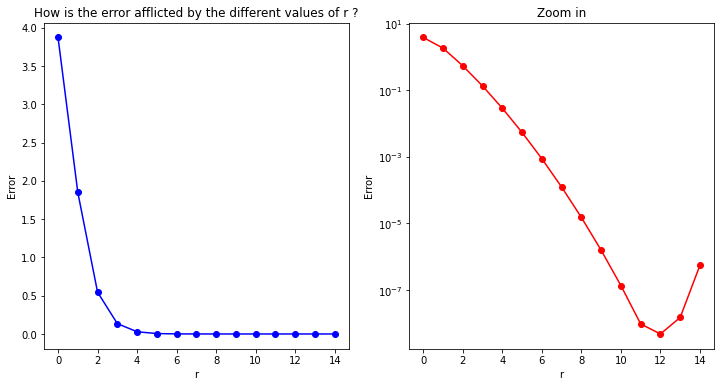

In [216]:
# Create figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Plot the errors
axs[0].plot(errors, 'bo-')
axs[0].set_xlabel('r')
axs[0].set_ylabel('Error')
axs[0].set_title('How is the error afflicted by the different values of r ?')

# Create a semilog plot to help visualize the data
axs[1].semilogy(errors, 'ro-')
axs[1].set_xlabel('r')
axs[1].set_ylabel('Error')
axs[1].set_title('Zoom in')

# Show the plot
plt.show()

From the above plots it is obvious that the best value to truncate is 12. We notice that the error keeps decreasing while adding columns to the SVD but after a point the error starts increasing again, probably because of the noise.

In [217]:
print("The error with the optimal truncation is: ", truncated_SVD(A, y, 12))

The error with the optimal truncation is:  4.78733839207236e-09


The best method seems to be truncated SVD, followed by regularized QR, normal QR and finally normal equations. So the "ranking" is:

* Optimally Truncated SVD
* Regularized QR
* QR
* Normal Equations

This sequence makes sense, since normal equations are not really accurate when matrix A is in a poor condition (in our case it is). Regularized QR is also naturally better than normal QR, which is the point of the regularization, as it enhances the numerical stability. Finally, SVD is much stronger than the rest of the methods, so it is expected that it has the best results. It should be noted though that regularized QR is very close.

# PART B

# Least Squares with Constraints

In [218]:
# Form the matrices A, C, and the vectors b, d
x_point = np.array([1, 2, 4, 5, 6, 7, 9, 10])
A = np.vander(x_point, 5, increasing = True)
rows_to_select = [2, 4, 7]
C = A[rows_to_select]
b = np.array([1, 2, 3, 4, 5, 4, 5, 6])
d = np.array([3, 5, 6])

### Step 1

In [219]:
AC = np.hstack((A.T, C.T)).T

Q, R = qr(AC)

Q_cut = Q[:, :5]
R_cut = R[:5, :5]

Q1 = Q_cut[:8, :]
Q2 = Q_cut[8:, :]

Q_bar, R_bar = qr(Q2.T)

Q_bar_cut = Q_bar[:, :3]
R_bar_cut = R_bar[:3, :3]

### Step 2

In [220]:
# Solve R_bar*u = d
u = np.linalg.solve(R_bar_cut.T, d)

# Calculate # c = Q_bar.T * Q1.T * b - u
c = Q_bar_cut.T @ Q1.T @ b - u

### Step 3

In [221]:
# Solve R_bar * w = c
w = np.linalg.solve(R_bar_cut, c)

# Calculate y = Q1.T*b - Q2.T*w
y = Q1.T @ b - Q2.T @ w

### Step 4

In [222]:
# Calculate R*x = y
x = np.linalg.solve(R_cut, y)
print("The coefficients of the polynomial: \n", x)

The coefficients of the polynomial: 
 [ 4.71580473 -5.03240683  2.03725827 -0.26791927  0.01158017]


#### Note: In steps 2, 3, and 4 we used np.linalg.solve like in the whole notebook. This method is the optimal method to solve linear systems like Ax = b. It uses LU decomposition, but it also contains a series of 'if' statements that save computing power. This case is one where we need these if statements, as step 2 needs forward substitution and step 3, step 4 need back substitution. The internal code of the function detects the linear system's properties ensuring efficiency. In general, this function is implemented in highly optimized C and is commonly used in large-scale problems.

### Plot the curve along with the points

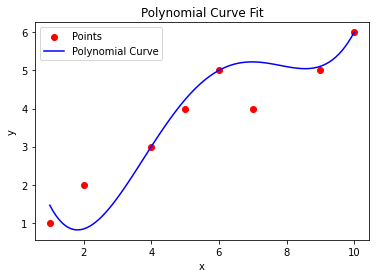

In [223]:
# Define the points
points = np.array([[1, 1], [2, 2], [4, 3], [5, 4], [6, 5], [7, 4], [9, 5], [10, 6]])

# Extract x and y values from the points
x_values = points[:, 0]
y_values = points[:, 1]

# Generate x values for the polynomial curve
curve_x = np.linspace(min(x_values), max(x_values), 100)

# Evaluate the fourth-degree polynomial curve
curve_y = np.polyval(x[::-1], curve_x)

# Plot the points
plt.scatter(x_values, y_values, color='red', label='Points')

# Plot the polynomial curve
plt.plot(curve_x, curve_y, color='blue', label='Polynomial Curve')

# Set the labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Curve Fit')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Least Squares without Constraints

In [224]:
Q, R = qr(A)

Q_cut = Q[:, :5]
R_cut = R[:5, :5]

x = np.linalg.solve(R_cut, Q_cut.T @ b)

In [225]:
print("The coefficients of the polynomial: \n", x)

The coefficients of the polynomial: 
 [ 1.09855072 -0.47427317  0.56853755 -0.09568731  0.00484848]


### Plot the curve along with the points

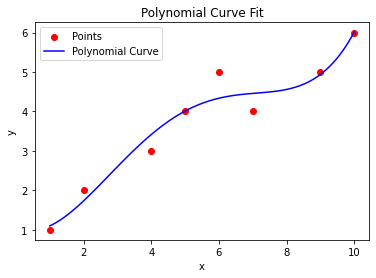

In [226]:
# Define the points
points = np.array([[1, 1], [2, 2], [4, 3], [5, 4], [6, 5], [7, 4], [9, 5], [10, 6]])

# Extract x and y values from the points
x_values = points[:, 0]
y_values = points[:, 1]

# Generate x values for the polynomial curve
curve_x = np.linspace(min(x_values), max(x_values), 100)

# Evaluate the fourth-degree polynomial curve
curve_y = np.polyval(x[::-1], curve_x)

# Plot the points
plt.scatter(x_values, y_values, color='red', label='Points')

# Plot the polynomial curve
plt.plot(curve_x, curve_y, color='blue', label='Polynomial Curve')

# Set the labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Curve Fit')

# Add a legend
plt.legend()

# Show the plot
plt.show()

The result of this plot is as we expected, since it is trying to minimize the errors, but it takes into account all the distances optimally. 
On the other hand, the constrained plot considered only the differences from all the points without the constraints (since the differences from the constrained points are essentially 0). These differences are not optimal anymore, becaused we "sacrificed" them in order to force the curve to pass exactly from the given 3 points. In general, it depends on the goal of the project, there is no rule of thumb that could say for example that the least squares approximation without constraints is always better. It is a trade-off that we weigh in each project and tune it to fit our exact situation. For example, we could have been informed about some predictions with a very high certainty, and in that case the constrained model could be better. All in all, both methods are useful but in different circumstances.